In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import sklearn.decomposition as sk_decomp

# Users

In [3]:
pp_users = pd.read_csv('data/PP_users.csv')
pp_users.index = pp_users['u']
pp_users['techniques'] = pp_users['techniques'].apply(ast.literal_eval)
pp_users['items'] = pp_users['items'].apply(ast.literal_eval)
pp_users['ratings'] = pp_users['ratings'].apply(ast.literal_eval)

<AxesSubplot:>

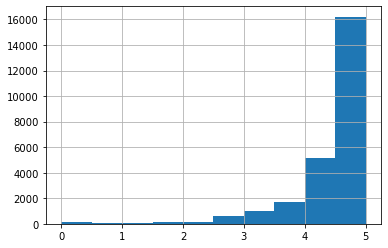

In [3]:
pp_users['avg_rating'] = [np.mean(ratings) for ratings in pp_users['ratings']]
pp_users['avg_rating'].hist()

<AxesSubplot:>

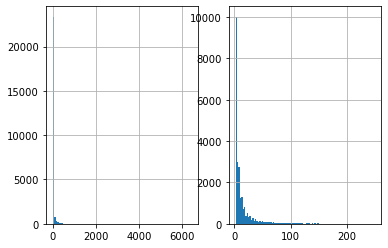

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2)

pp_users['n_items'].hist(bins = 100, ax=axes[0])
pp_users[pp_users['n_items'] < 250]['n_items'].hist(bins = 100, ax=axes[1])


# Extraction for Test Bandit, very unsure how to go about offline training

In [10]:
def extract_users(pp_users, lb = 25, ub = 25):
    temp_df = pp_users[pp_users.n_ratings >= lb]
    temp_df = temp_df[temp_df.n_ratings <= ub]
    return temp_df

def extract_user_recipe_df(temp_df):
    
    unique_recipes = np.unique([item for item_list in temp_df['items'] for item in item_list])
    num_recipes = len(unique_recipes)
    recipe_id_to_new_id = dict(zip(unique_recipes, range(num_recipes)))
    user_context_df = temp_df[['u', 'items', 'ratings']]
    rating_vectors = []
    for i, (index, row) in enumerate(user_context_df.iterrows()):
        rating_vectors.append(list(np.zeros(num_recipes)))
        for j, item_id in enumerate(row['items']):
            rating_vectors[i][recipe_id_to_new_id[item_id]] = row['ratings'][j]
    user_context_df['item_ratings'] = rating_vectors
    return user_context_df[['u', 'item_ratings']], recipe_id_to_new_id, unique_recipes


In [11]:
pp_recipes = pd.read_csv('data/PP_recipes.csv')
pp_recipes.ingredient_ids = pp_recipes.ingredient_ids.apply(ast.literal_eval)

def extract_recipe_ingredient_df(unique_recipes, recipe_mapper, pp_recipes):
    

    recipes_oi = pp_recipes.set_index('id').iloc[unique_recipes,:]
    
    recipes_oi['new_id']=[recipe_mapper[id_] for id_ in unique_recipes]
    unique_ingredients = np.unique([item for item_list in recipes_oi['ingredient_ids'] for item in item_list])
    num_ingredients = len(unique_ingredients)
    ingredient_id_to_new_id = dict(zip(unique_ingredients, range(num_ingredients)))
    recipe_ingredient_df = recipes_oi[['new_id', 'ingredient_ids']]
    
    ingredient_vectors = []
    for i, row in recipe_ingredient_df.iterrows():
        temp = np.zeros(num_ingredients)
        for ing_id in row['ingredient_ids']:
            temp[ingredient_id_to_new_id[ing_id]] = 1
        ingredient_vectors.append(list(temp))
    recipe_ingredient_df['ingredients'] = ingredient_vectors
    return recipe_ingredient_df

In [12]:
def get_test_data(pp_users, pp_recipes):
    temp_df = extract_users(pp_users)
    user_recipes, recipe_mapper, unique_recipes = extract_user_recipe_df(temp_df)
    recipe_ingreds = extract_recipe_ingredient_df(unique_recipes, recipe_mapper, pp_recipes)
    return user_recipes, recipe_ingreds

In [13]:
test1, test2 = get_test_data(pp_users, pp_recipes)

<ipython-input-10-e1055b734e7a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_context_df['item_ratings'] = rating_vectors
<ipython-input-11-bb5f49223b20>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_ingredient_df['ingredients'] = ingredient_vectors


In [14]:
test1.to_csv('user_recipes.csv')

In [15]:
test2.to_csv('recipe_ingreds.csv')

In [123]:
]:
print('observation spec: ', per_arm_tf_env.observation_spec())
print('\nAn observation: ', per_arm_tf_env.reset().observation)

action = tf.zeros(BATCH_SIZE, dtype=tf.int32)
time_step = per_arm_tf_env.step(action)
print('\nRewards after taking an action: ', time_step.reward)

<ipython-input-123-27e15b99684a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_ingredient_df['ingredients'] = ingredient_vectors


In [124]:
recipe_ingredient_df

,ingredient_ids,ingredients
id,,
108065,"[63, 5010, 1124, 7229, 1803, 7557, 519, 3815, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
285087,"[840, 6906, 1910, 2499, 7449, 2683, 1388, 6473]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
324962,"[7557, 5010, 1093, 3399, 3203, 7143, 2125, 755...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
116522,"[7819, 4284, 3203, 2909, 2879, 840, 4096, 2816]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
180301,"[840, 6696, 7049, 5555, 5033]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
223531,"[2633, 5006, 2879, 6270, 5319]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
321698,"[5724, 1045, 1871, 2757]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
432844,"[5381, 2874, 6906, 1645, 1833, 4253]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Recipes

In [30]:
raw_recipes = pd.read_csv('data/RAW_recipes.csv')
raw_recipes.ingredients = raw_recipes.ingredients.apply(ast.literal_eval)
raw_recipes.tags = raw_recipes.tags.apply(ast.literal_eval)
raw_recipes.nutrition = raw_recipes.nutrition.apply(ast.literal_eval)
raw_recipes.steps = raw_recipes.steps.apply(ast.literal_eval)
raw_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,[place potatoes in a large pot of lightly salt...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"[ham, 60-minutes-or-less, time-to-make, course...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"[heat oil in a 4-quart dutch oven, add celery ...",this is a delicious soup that i originally fou...,"[celery, onion, green sweet pepper, garlic clo...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"[15-minutes-or-less, time-to-make, course, pre...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,[mix all ingredients together thoroughly],this spice mix will make your taste buds dance!,"[paprika, salt, garlic powder, onion powder, d...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"[60-minutes-or-less, time-to-make, course, mai...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"[in a bowl , combine the mashed yolks and mayo...","deviled eggs, cajun-style","[hard-cooked eggs, mayonnaise, dijon mustard, ...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"[30-minutes-or-less, time-to-make, course, pre...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,[place melted butter in a large mixing bowl an...,"i've heard of the 'cookies by design' company,...","[butter, eagle brand condensed milk, light bro...",10


In [31]:
len(raw_recipes)

231637

<AxesSubplot:>

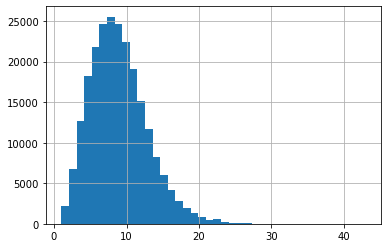

In [32]:
raw_recipes.n_ingredients.hist(bins=40)

In [33]:
ingredient_frequencies = raw_recipes.explode('ingredients').groupby('ingredients').count()['id']

<AxesSubplot:>

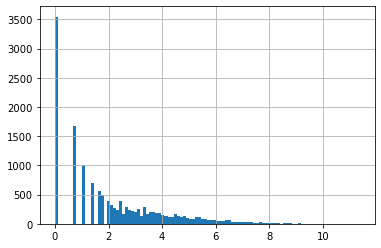

In [34]:
import numpy as np
np.log(ingredient_frequencies).hist(bins = 100)

<AxesSubplot:>

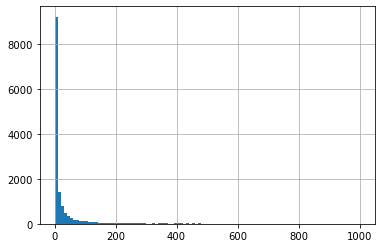

In [35]:
ingredient_frequencies[ingredient_frequencies < 1000].hist(bins = 100)

<BarContainer object of 10 artists>

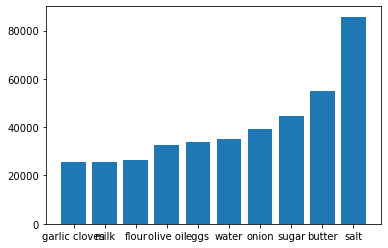

In [36]:
top_ingredients = ingredient_frequencies.sort_values().tail(n = 10)
plt.bar(x = top_ingredients.index, height = top_ingredients)

# User - Ingredient Lists

In [28]:
raw_recipes[raw_recipes.id == 486161]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
231632,zydeco soup,486161,60,227978,2012-08-29,"[ham, 60-minutes-or-less, time-to-make, course...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"[heat oil in a 4-quart dutch oven, add celery ...",this is a delicious soup that i originally fou...,"[celery, onion, green sweet pepper, garlic clo...",22


In [12]:
user_recipes = pp_users.explode('items')[['items', 'u']]

user_ingredients = user_recipes.merge(raw_recipes, left_on = 'items', right_on = 'id')[['u', 'ingredients']]

In [13]:
user_ingredients = user_ingredients.groupby('u')['ingredients'].apply(list).apply(lambda x: [elem for list_ in x for elem in set(list_)])

<AxesSubplot:>

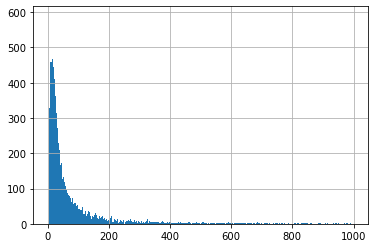

In [15]:
user_ingredient_frequencies = user_ingredients.apply(len)
user_ingredient_frequencies[user_ingredient_frequencies < 1000].hist(bins = 1000)

# Interactions (reviews)

In [84]:
recipes.iloc[0, :]['ingredients']

"['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']"

In [85]:
temp

[40480, 1943, 6987, 12187, 4423, 23841, 12432, 4530, 40481]

In [46]:
temp = ast.literal_eval(recipes.iloc[0, :]['name_tokens'])

In [32]:
import pickle
mapper = pickle.load(open("data/ingr_map.pkl", 'rb'))

In [78]:
mapper.where(mapper.id)

ValueError: Boolean array expected for the condition, not int16

In [82]:
mapper[mapper.id == temp[7]]

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
8309,manchego cheese,2,manchego cheese,15,manchego cheese,74,4530


In [79]:
temp

[40480, 1943, 6987, 12187, 4423, 23841, 12432, 4530, 40481]

In [87]:
mapper

,raw_ingr,raw_words,processed,len_proc,replaced,count,id
0,"medium heads bibb or red leaf lettuce, washed,...",13,"medium heads bibb or red leaf lettuce, washed,...",73,lettuce,4507,4308
1,mixed baby lettuces and spring greens,6,mixed baby lettuces and spring green,36,lettuce,4507,4308
2,romaine lettuce leaf,3,romaine lettuce leaf,20,lettuce,4507,4308
3,iceberg lettuce leaf,3,iceberg lettuce leaf,20,lettuce,4507,4308
4,red romaine lettuce,3,red romaine lettuce,19,lettuce,4507,4308
...,...,...,...,...,...,...,...
11654,soybeans,1,soybean,7,soybean,31,6702
11655,goose,1,goose,5,goose,8,3318
11656,ajwain,1,ajwain,6,ajwain,13,47
11657,brinjals,1,brinjal,7,brinjal,2,750


In [60]:
temp[0]

40480